# Lab 4
## Functions, Errors, and Geopandas

### Warning: You must be on a Python 3 kernel for this lab to work. ArcPy uses 2.7, but as we transition from desktop automation and towards online and web (as well as ArcPro) uses, we will be using Python 3.

In this lab, we're going to focus on creating our own [classes](https://docs.python.org/3/tutorial/classes.html) and [functions](https://www.tutorialspoint.com/python/python_functions.htm). We'll also get into a bit of error handling and dip our toes into GeoPandas (which we'll use later with the ArcAPI for Python). 

As always, the files needed are [here](https://github.com/UWTMGIS/TGIS501_Files) (don't forget to check out the scratch pad). When done simply upload a notebook or scripts (appropriately named) [here](https://github.com/UWTMGIS/TGIS501_W18)

## Problem 1

Create a script that creates the class Person with the following properties:
1. The class should initialize with a name and a birthday, but the birthday should be set as None by default.
2. The class should have three methods: .getName(), .setBirthday(), and .getAge()
3. .getName() returns the name of the person, .setBirthday **sets** the birthday to a date, and .getAge() *returns how many **days** old the Person is*.
4. .getAge() (and therefore .setBirthday()) will require you to work with the datetime module. You can learn more about it [here](http://effbot.org/librarybook/datetime.htm)


In [3]:
import  datetime

# Define class
class Person(object):
    
    # Some variables first
    name = ""
    bday = None

    def __init__(self, var):
        self.name = var
    
    # Person.getName() returns name 
    def getName(self):
        return self.name
        
    # Person.setBirthday(year, month, day) sets person birthday.  If input is incorrect, set default
    def setBirthday(self, yr, mo, day):
        try:
            self.bday = datetime.date(yr, mo, day)
        except:
            self.bday = datetime.date(1986, 7, 3)
            print("Error setting birthday, let's make it mine (07/03/1986)")
    
    # To check the birthday
    def getBday(self):
        return self.bday

    # Person.getAge() returns age in days
    def getAge(self):
        if self.bday == None:
            print("Error: Birthday not set.")
            return ""
        else:    
            now = datetime.date.today()
            daysAge = now - self.bday
            return daysAge
          
        
        
        

# Now lets test some stuff
Max = Person("Max Markowski-Lewis")
print(Max.getName())
Max.setBirthday(2004, 11, 3)
print(Max.getBday())

age = Max.getAge()
print(age, "\n")

MarkyMark = Person("Mark Whalberg")
print("Name: ", MarkyMark.getName())
print("DOB: ", MarkyMark.getBday(), "\n")

Bill = Person("Bill S. Preston, Esq.")
Bill.setBirthday(0, "blue", 0)
print(Bill.getBday(), "\n")

Ted = Person("Ted 'Theodore' Logan")
print(Ted.getAge())


Max Markowski-Lewis
2004-11-03
4840 days, 0:00:00 

Name:  Mark Whalberg
DOB:  None 

Error setting birthday, let's make it mine (07/03/1986)
1986-07-03 

Error: Birthday not set.



## Problem 2

Now, I want you to create a new class called Song.
1. The class should take a variable (a string - make sure to check for this) and store it as *lyrics*
2. It should have a method, .sing(), which prints out the stored lyrics.

Additionally:
1. Every instance of the class person should now also include a methode .checkBirthday()
2. .checkBirthday() should see if today is someone's birthday and ***if so*** it should print out "Happy birthday to you. Happy birthday to you. Happy birthday dear Person_Name, happy birthday to you."
3. It **must do this by using an instance of the Song class**. In other words, the .checkBirthday() method is going to call up a specific instance of the Song class - how will you do that?

**Please note:** You do not need to take input in these scripts. Although, if you wish to set up something that does so, that is fine as well.


*Additional note:* Assuming you are using a notebook, so long as you run your cells sequentially a class or function created will remain usable in other cells. In separate scripts, this is obviously not the case (although, you could begin to create your own 'module' of helpful functions/classes and simply import it whenever you begin coding - this is something you might want to do if you find yourself having to do the same sorts of things over and over again in slightly different contexts).



In [4]:
import  datetime
    
# Objectify people.
class Person(object):
    name = ""
    bday = None
    md = None

    def __init__(self, var):
        self.name = var

    def getName(self):
        return self.name

    def setBirthday(self, yr, mo, day):
        try:
            self.bday = datetime.date(yr, mo, day)
            self.md = self.bday.month, self.bday.day #  Added this to get birthday in mm/dd format
        except:
            self.bday = datetime.date(1986, 7, 3)
            print("Error setting birthday, let's make it mine (07/03/1986)")

    def getAge(self):
        if self.bday == None:
            print("Error: Birthday not set.")
            return ""
        else:
            now = datetime.date.today()
            daysAge = now - self.bday
            return daysAge
    
    # New checkBirthday method here    
    def checkBirthday(self):
        d = datetime.date.today()     # shorten datetime string
        md = d.month, d.day           # pull only month, day from today's date time
        if self.md == md:             # check against self birthday in mm/dd format
            honoree = self.name       # set var to Person instances particular name for use in song lyrics
            print(Song.sing(honoree))
            return self.bday
        else:
            return self.bday

# New Song object class, set instnace based on Person class
class Song(Person):
    
    # New method, calling name from honoree variable, defined in Person object
    def sing(honoree):
        lyrics = 'Happy birthday to you, happy birthday to you. Happy birthday' , honoree, 'Happy birthday to you.'
        # get rid of junk, not sure where this came from but, if I return the instance instead of print, they crop up
        return str(lyrics).replace("'", "").replace("(","").replace(")","") 


# Testing some stuff  

# Same bday, different year
Guy = Person('Guy Ritchie')
print (Guy.getName())

Guy.setBirthday (1968, 2, 3) # Actual birthday is 9/10/1968 - I know you were wondering
print(Guy.checkBirthday(),"\n")

# Different bday, different year
OtherGuy = Person("Guy Fieri")
OtherGuy.setBirthday(1968, 1, 22) # Must have been a popular name that year... 
print(OtherGuy.getName())
print(OtherGuy.checkBirthday(),"\n")

# No set birthday
EternalGuy = Person("Guy Fawkes")
print(EternalGuy.getName())
print(EternalGuy.checkBirthday(),"\n")

# Birthday = today
NewGuy = Person("Guy Junior")
i = datetime.date.today()
NewGuy.setBirthday(i.year, i.month, i.day)
print(NewGuy.getName())
print(NewGuy.checkBirthday())


Guy Ritchie
Happy birthday to you, happy birthday to you. Happy birthday, Guy Ritchie, Happy birthday to you.
1968-02-03 

Guy Fieri
1968-01-22 

Guy Fawkes
None 

Guy Junior
Happy birthday to you, happy birthday to you. Happy birthday, Guy Junior, Happy birthday to you.
2018-02-03


## Problem 3

There's an age-old programming 'challenge' called FizzBuzz. You'll often see it pop up as a very rudimentary screening against those who claim they can write code. You're going to solve a variant of it.

Create a **function** (call it fizzbuzz) which takes a single number as its parameter. The function then prints out every number from 1 to the input, **except** for numbers divisible by 3 it prints out "fizz", for numbers divisible by 5 it prints out "buzz", and for numbers divisible by 3 **and** 5 it prints out "fizzbuzz."

For example, the output for an input of 15 would look like: 1, 2, fizz, 4, buzz, fizz, 7, 8, fizz, buzz, 11, fizz, 13, 14, fizzbuzz
**Output format doesn't matter (single line, multiple lines, etc.)**

A few notes:
1. You must take your input from **outside** of your function.
2. You must use a function
3. Your script must not fail if I put in something other than an integer (*aha! error catching!*)

In [78]:
# Take user input, make sure it is an integer
test = False
while not test:
    try:
        num = int(input('Enter a positive, whole number: '))
        if num > 0:
            test = True
        else:
            print("That's a negative number, try again.\n")
    except ValueError:
        print("That's not an integer, please try again.\n")

        
# start count at 1
count = 1

# set while loop to replace numbers with words up to and including (<=) count
while count <= num:
    if count % 3 == 0:
        
        # If divisible by 3 and 5 (ie, multiples of 15):
        if count % 15 ==0:
            print("FizzBuzz")
            count=count+1
            
        # If only divisible by 3:
        else:
            print("Fizz")
            count = count+1
    
    # If divisible by 5 (excluding those divisible by 3 and 5, which we already handled):
    if count % 5 == 0:
        print("Buzz")
        count = count+1
   
    # If neither, print counter
    else:
        print(count)   
        count = count+1



            

Enter a positive, whole number: poo
That's not an integer, please try again.

Enter a positive, whole number: -5
That's a negative number, try again.

Enter a positive, whole number: 31
1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31


## Introducing GeoPandas and Folium

Before we go any further, you'll need to install geopandas.
In conda, you can do so with a 'conda install geopandas -c conda-forge' command from within your virtual environment. 

Let's check to see how you are doing.

In [82]:
import geopandas
%matplotlib inline
print('Check, it works')

Check, it works


If the above cell runs without error, congratulations, you have installed geopandas.
The second line tells matplotlib (a plotting library) that we want our maps to appear 'inline' (here in the notebook).

Let's get started!

_GeoPandas_ is essentially a miniature, python-based, open-source GIS. It achieves much of its functionality by wrapping (making use of) existing non-spatial libraries, adding some GIS-specific aspects along the way.

The most powerful new data type introduced by _GeoPandas_ is the _GeoDataFrame_ (specific instances of such data types sometimes have _gdf_ in their variable names, you might notice.) The _GeoDataFrame_ builds spatial functionality into the _DataFrame_--which is a data type introduced in the (non-spatial) data science package called _Pandas_. Pandas dataframes have similarities to a central data type in the language _R_.

A _GeoDataFrame_ is essentially a big spatial database table of the sort you see in the results of this next code cell. It bears some similarities to ArcGIS's tables, but certain simpler manipulations of tables are much easier within python. You don't need cursors and the syntax is often less tortured; additionally, operations in GeoDataFrame often have built in loops and iteration.

In the next cell, we are going to load up a polygon-based dataset of countries in the world. It is included with GeoPandas and comes from the free dataset found at http://www.naturalearthdata.com

In truth, behind the scenes, GeoPandas is using another spatial data library for python called Fiona which is itself using the open-source GDAL/OGR libraries. You can read more about that here: http://geopandas.org/io.html

***Again, the key thing to remember here is that while the syntax (and tools) are different than ArcGIS, the concepts are the same.***

We're going to load and query some data. We'll then use the .head(7) method to then display the first seven entries of the database.

In [97]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
    # NaturalEarth is a free dataset that comes with geopandas.
    #    See: http://www.naturalearthdata.com/ 
    # We could have just used a string with the filename of a shapefile there,
    #    instead of geopandas.datasets.get_path('naturalearth_lowres').

world.head(7) # show us the data for the first seven polygons (countries) in the file

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...


If you look above, you'll see a population column (pop_est) and a GDP column (gdp_md_est - md stands for "millions of dollars".

Let's create a new column that is a GDP per person estimate. This will take a single line of code (compare that to doing the same task in ArcPy).

In [98]:
world['gdp_per_cap']= world.gdp_md_est / world.pop_est *1000000

world.head(7)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",784.154930
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,8617.663491
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",5992.658787
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",38407.907819
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,14027.126052
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",6326.246948
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,200000.000000


In [99]:
#This lets you see what the column names are

world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'gdp_per_cap'],
      dtype='object')

In [100]:
#We can call the columns we wish to display like so.

(world[['name', 'gdp_per_cap']]).head(10)

,name,gdp_per_cap
0,Afghanistan,784.154930
1,Angola,8617.663491
2,Albania,5992.658787
3,United Arab Emirates,38407.907819
4,Argentina,14027.126052
5,Armenia,6326.246948
6,Antarctica,200000.000000
7,Fr. S. Antarctic Lands,114285.714286
8,Australia,37634.083179
9,Austria,40132.609347


In [101]:
#Or the .iloc() method lets us select a single (range of) rows

world.iloc[30]

pop_est                                              1.33861e+09
continent                                                   Asia
name                                                       China
iso_a3                                                       CHN
gdp_md_est                                             7.973e+06
geometry       (POLYGON ((110.3391878601516 18.67839508714761...
gdp_per_cap                                              5956.17
Name: 30, dtype: object

Ok, but let's do some spatial stuff, huh?

How about a choropleth map based on per capital gdp?

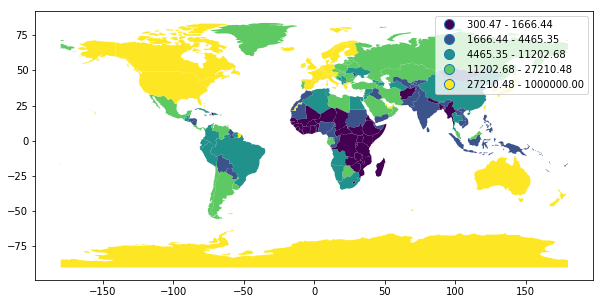

In [102]:
world.plot(column="gdp_per_cap",scheme='quantiles',k=5,legend=True,figsize=(10,5))

Let's reproject the data and change the 'colormap'

Here, we are borrowing functionality from fiona, another geospatial python library.

Fiona is actually a python wrapper for gdal/ogr. See: http://toblerity.org/fiona/manual.html

In particular, we want to get a Coordinate Reference System string that will correspond to a
specific Euler projection defined in a 'proj4' format string: "+proj=euler +lat_1=67 +lat_2=75"

Once we have put the projection into a format GeoPandas can understand, we can reproject the existing GeoDataFrame. The _inplace=True_ in the code below means the existing GeoDataFrame called 'world' is modified, instead of us needing to assign the result of the method/function to a new variable.

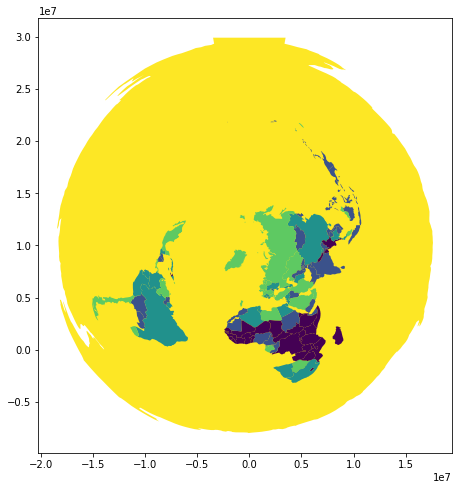

In [103]:
import fiona
import fiona.crs
EulerCRS = fiona.crs.from_string("+proj=euler +lat_1=67 +lat_2=75")

world.to_crs(crs=EulerCRS, inplace=True)

world.plot(column="gdp_per_cap",scheme='quantiles',k=5,figsize=(8,8))

### Uh oh, something went wrong. Can you figure out what it is?












...Antarctica has been flipped inside-out! The interior of Antarctica is now covering the whole planet and what used to be the interior of Antarctica is now an ocean. Oops! This is a result from the interaction of our particular data, the projection, and the drawing algorithm. The easiest way to revolve this issue is to remove Antarctica...

In [104]:
worldWithoutAntarctica = world[(world['name'] != 'Antarctica')]

That single line above created a geoDataFrame **without** Antarctica in it.
It is, in essence, a select by attribute query done in a single line of code.

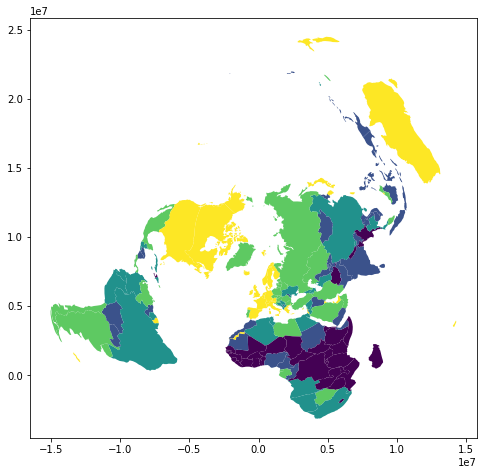

In [105]:
polarplot = worldWithoutAntarctica.plot(
    column="gdp_per_cap",
    scheme='quantiles',k=5,
    figsize=(8,8))

### Ok, this is getting long.
And I want you to start playing with some data, but I want to show you one more thing in geopandas. I am going to load in a point layer of cities data. I am then going to do a **select by location** where we select only cities in countries with a per capita GPD greater than 30000.

I will display those cities on the map.

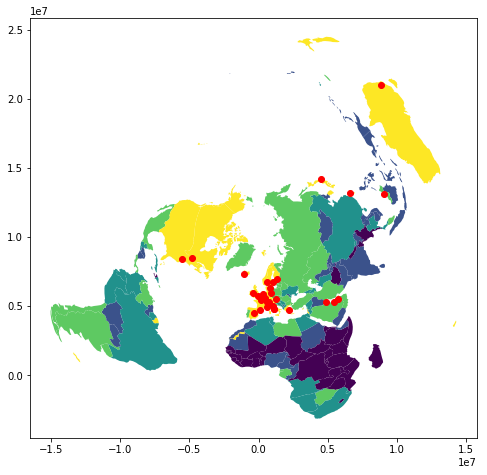

In [106]:

#Just setting the 'base' for my map below (this could be called anything)
base = worldWithoutAntarctica.plot(
    column="gdp_per_cap",
    scheme='quantiles',k=5,
    figsize=(8,8))



#Much like the countries data, I am using an included layer of cities.
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

#Now I am going to reproject the cities data
cities.to_crs(crs=EulerCRS, inplace=True)

#Time for a spatial join
cities_gdp = geopandas.sjoin(cities, worldWithoutAntarctica, how='inner', op='within')

#and the finale
cities_gdp[cities_gdp['gdp_per_cap']>30000].plot(ax=base, color='red')



That's not the prettiest map and the syntax can be a bit confusing (do you see how I nest my selection of 'greater than 30000' in there?).

But, that's a very simple demonstration of the power of GeoPandas to manipulate and visualize spatial data.

## If you want to, you can stop here. 
### What comes next is a lot of fun and there is a bonus question at the end.

Still there? Great.

Here's what I am going to do:
1. Load up a shapefile (yes, GeoPandas can handle them)
2. Convert said shapefile to .geojson
3. Create two points and similarly store them as .geojson
4. Load all of that up on a web map using Folium

I'll explain each step along the way, but also know that we'll go over most of this in more detail soon. Let's go.

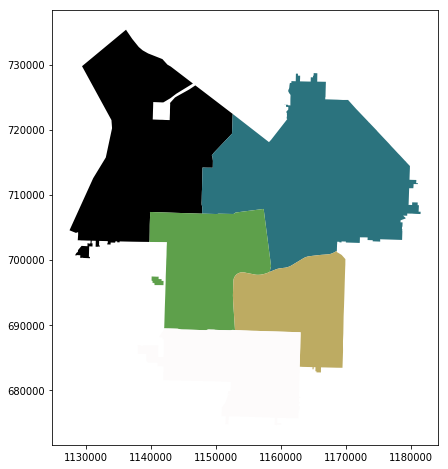

In [84]:
#your location may differ
#This is just the Tacoma City Council Districts
tacoma = geopandas.read_file('/Users/austin/Downloads/cnclmp2012/cnclmp2012.shp')

#Let's just plot it and take a look
tacoma.plot(column='DIST_ID',
           linewidth=0.0,
           figsize=(8,8),
           cmap='gist_earth')

In [85]:
#Now, let's output each council district as a .geojson file

tacoma = tacoma.to_crs(epsg=4326)
#I'm just moving this back to WGS 1984 because some GeoJSON readers can't handle other projections
#Although they should be able to!

import os

for district in tacoma['DIST_ID']:
    filename = 'District'+str(district)+'.geojson'
    print('Outputting: '+filename)
    try:
        os.remove(filename)
    except OSError:
        pass
    tacoma[tacoma['DIST_ID'] == district].to_file(filename, driver='GeoJSON')
    
    # the .to_file() method of a GeoDataFrame writes it out to a Shapefile (or, in this case,
    #  when I set the driver="GEOSJON", so a GeoJSON file.)
    
    # Note the whole try/except business is just because the to_file throws an error if 
    #  the file already exists, so we delete it manually.
    # If we don't get an error, we just move right along

    


Outputting: District1.geojson
Outputting: District2.geojson
Outputting: District3.geojson
Outputting: District4.geojson
Outputting: District5.geojson


Whew, now we have five geojson files. One for each City Council district of Tacoma.

Let's see what happens if we load them onto a web map.
Here, we're going to be using [Folium](https://github.com/python-visualization/folium) which is essentially a python wrapper for creating [Leaflet](http://leafletjs.com/) maps.

You install it just like any other module. ;)

In [86]:
import folium

m = folium.Map(
        location=[47.2529, -122.4443],
        tiles='Mapbox Bright',
        zoom_start=9
         )

folium.GeoJson(
        'District1.geojson',
        name='geojson'
        ).add_to(m)

m

### Pretty swanky. 

Now, let's create some points in GeoPandas and then put them on the map.
How about one roughly near UWT and one up near Proctor.

To do this, I'm going to pretend you have a bit of 'data' in a specific format, then I'll walk through how we convert that format into something GeoPandas can handle programmatically. It's a bit contrived, as you'll see, but think about how you might - *I don't know* - just read in various files and parse them in this way.

In [87]:
import geopandas

data = [['UWT', '47.246613', '-122.438813'], ['UPS','47.263660','-122.482941']]

geo = geopandas.GeoDataFrame(data, columns=['name','lat','long'])

print(geo)

geo.plot()

  name        lat         long
0  UWT  47.246613  -122.438813
1  UPS  47.263660  -122.482941


AttributeError: No geometry data set yet (expected in column 'geometry'.

## Hey, what's going on?

Look at the bottom there. There's no valid geometry column, GeoPandas can't recognize the separate lat and long entries.

Let's do this again:
1. Make a Pandas Dataframe
2. Make a GeoSeries (this is like a fancy list that GeoPandas uses for geometry) with our coordinates
3. Make a GeoDataFrame that has the GeoSeries for geometry and the DataFrame as our attribute data
4. Map it on a slippy map


In [100]:
import shapely, shapely.geometry, fiona, fiona.crs, pandas, folium

data = [['UWT', 47.246613, -122.438813], ['UPS',47.263660,-122.482941]]

panda = pandas.DataFrame(data, columns=['name','lat','long'])
print(panda)

#Here I use the zip function to basically... 'zip' two list items into one.
#Find out more here: https://docs.python.org/2/library/functions.html#zip
coords = zip(panda['long'], panda['lat'])

#I am going to collapse a for loop into a single line here, watch how

geometry = [shapely.geometry.Point(c) for c in coords]
#Shapely is a library with the point data type GeoPandas uses for coordinates

#Now, I'm going to make that geometry into a GeoSeries
geolist = geopandas.GeoSeries(geometry)

#Ok, let's put it all together.
geoPoints = geopandas.GeoDataFrame(panda, geometry=geolist)

#And now, TO A WEB MAP
geoPoints.crs=fiona.crs.from_epsg(4236) #What am I doing here? Why?

import folium

map2 = folium.Map(
        location=[47.2529, -122.4443],
        zoom_start=9
         )

twopoints = folium.features.GeoJson(geoPoints.to_json()).add_to(map2)


map2

  name        lat        long
0  UWT  47.246613 -122.438813
1  UPS  47.263660 -122.482941


## Bonus Question 1 (+2 pts total, partial credit possible):

Take the natural earth cities layer that we worked with earlier and convert it into a folium map (1 point). Get it to display as a choropleth (1 point).

In [140]:
import fiona, fiona.crs, folium, geopandas

# Get data
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

# Create GeoDataFrame from cities data
geoPoints = geopandas.GeoDataFrame(cities)

# Convert points to web-map firendly projection
geoPoints.crs=fiona.crs.from_epsg(4236)

# Create map with cool styling
Mapsies = folium.Map(
        location=[0, 0], # change start coords to center map 
        tiles='stamenwatercolor',
        zoom_start=2
         )

# Add map layer
folium.features.GeoJson(geoPoints.to_json()).add_to(Mapsies)

# Print map
Mapsies

In [203]:
import fiona, fiona.crs, folium, geopandas

# Get data
feats = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Create GeoDataFrame from data
geoPoints = geopandas.GeoDataFrame(feats)

# Convert points to web-map firendly projection
geoPoints.crs=fiona.crs.from_epsg(4236)

# Create map with cool styling
mp = folium.Map(
        location=[0, 0],   # Omit tile type to get basic basemap - better for choropleth
        zoom_start=2
         )

# Add map layer
mp.choropleth(geo_data = geoPoints, key_on='pop_est', fill_color ='BuGn') 

# Print map
mp

## Bonus Question 2 (+2 pts total, partial credit)

I want a global choropleth map of countries by their per capita gdp in a web map.
In other words, take the naturalearth_lowres file and make a choropleth map of it using Folium 
Now, add only those cities in countries with per capita GDPs > 25,000. (1 pt).
Finally, get markers that will pop up with the name of the city, the country it is in, and the per capita gdp when I click upon the points (1 pt).

## Bonus Question 3 (1pt)

Write a script that calculates the distance between the UWT and UPS points used above in feet.